<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/Uni-logo_transparente_granate.png" alt= "LOGO CAT" width=400 height=400 align = "right">

<br>
<h1><font color="#7F000E" size=5> Maestria de Ciencias de la Computacion UNI</font></h1>

<h1><font color="#7F000R" size=6> SEMINARIO DE TESIS I-MCC701 </font></h1>
<h1><font color="#7F000E" size=5> Desarrollo de sistema de  pronóstico de centelleo ionosférico sobre el Perú para alerta de
perturbaciones en señales satelitales
 </font></h1>
<br>

<br>
<div style="text-align:right">
<font color="#7F000E" size=3> Alumno:  Alexander Valdez Portocarrero</font><br>
<font color="#7F000E" size=3> Codigo: 20207072E </font><br>
<font color="#7F000e" size=3> Ciclo 2024-2 </font><br>
</div>



---

#**1. Cargando el conjunto de Datos, correspondiente a 1 año de S4 de la Estacion ROJ**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
PATH = "/content/gdrive/MyDrive/MAESTRIA_MCC_2024_2/SEMINARIO_TESIS/CURSO MCC701-SEMINARIO DE TESIS 2024/REUNION_24012025"
filename= "2024_output_combined_satellites_data.csv"
file_dir = os.path.join(PATH,filename)
print(file_dir)

/content/gdrive/MyDrive/MAESTRIA_MCC_2024_2/SEMINARIO_TESIS/CURSO MCC701-SEMINARIO DE TESIS 2024/REUNION_24012025/2024_output_combined_satellites_data.csv


#**2. LECTURA DE DATOS**

In [5]:
import pandas as pd
df = pd.read_csv(file_dir)

In [6]:
df

,ID Satélite,Tiempo,S4,Elevación
0,1,2024-12-29 14:32:00,0.106,8.0
1,2,2024-01-01 15:22:00,0.197,9.0
2,2,2024-01-01 15:23:00,0.148,9.0
3,2,2024-01-01 15:24:00,0.310,9.0
4,2,2024-01-01 15:25:00,0.025,10.0
...,...,...,...,...
12559762,215,2024-10-01 12:40:00,0.015,60.0
12559763,215,2024-10-01 12:41:00,0.028,60.0
12559764,215,2024-10-01 12:42:00,0.018,60.0
12559765,215,2024-10-01 12:43:00,0.023,60.0


In [11]:
# CONVERTIMOS LA COLUMNA 'Tiempo' a tipo datetime para operaciones posteriores si es necesario
df['Tiempo'] = pd.to_datetime(df['Tiempo'])

In [10]:
df.describe()

,ID Satélite,Tiempo,S4,Elevación
count,1.255977e+07,12559767,1.255977e+07,1.255977e+07
mean,6.443412e+01,2024-07-10 03:12:45.160971008,7.294511e-02,3.607424e+01
min,1.000000e+00,2024-01-01 00:01:00,0.000000e+00,0.000000e+00
25%,2.500000e+01,2024-04-15 18:18:00,2.700000e-02,2.300000e+01
50%,5.400000e+01,2024-07-12 13:49:00,5.600000e-02,3.400000e+01
75%,9.400000e+01,2024-10-03 01:19:00,9.900000e-02,4.700000e+01
max,2.150000e+02,2024-12-31 23:45:00,1.818000e+00,9.000000e+01
std,4.874255e+01,NaN,7.273726e-02,1.734240e+01


#**FILTRANDO UN SATELITE POR ID**

In [20]:
import matplotlib.pyplot as plt
# Aplicar el filtro para seleccionar solo las filas con ID Satélite igual a 2
ID_Sat_2 = df[df['ID Satélite'] == 2]

# Mostrar el resultado
print(ID_Sat_2)

        ID Satélite              Tiempo     S4  Elevación
1                 2 2024-01-01 15:22:00  0.197        9.0
2                 2 2024-01-01 15:23:00  0.148        9.0
3                 2 2024-01-01 15:24:00  0.310        9.0
4                 2 2024-01-01 15:25:00  0.025       10.0
5                 2 2024-01-01 15:26:00  0.301       10.0
...             ...                 ...    ...        ...
146313            2 2024-12-31 22:21:00  0.424        8.0
146314            2 2024-12-31 22:22:00  0.243        8.0
146315            2 2024-12-31 22:23:00  0.418        8.0
146316            2 2024-12-31 22:24:00  0.375        7.0
146317            2 2024-12-31 22:25:00  0.000        7.0

[146317 rows x 4 columns]


# **3. VISUALIZACION DE DATOS**

## **METODO GRAFICAR POR PERIODO - V1**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
# Función para graficar diferentes períodos

def graficar_por_periodo(df, inicio, fin, titulo):
    # Filtrar los datos por el rango de fechas
    datos_filtrados = df[(df['Tiempo'] >= inicio) & (df['Tiempo'] <= fin)]

    # Crear el gráfico
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Graficar S4 en el eje Y izquierdo
    ax1.plot(datos_filtrados['Tiempo'], datos_filtrados['S4'], color='blue', marker='o', label='S4')
    ax1.set_xlabel('Tiempo')  # Etiqueta del eje X
    ax1.set_ylabel('S4', color='blue')  # Etiqueta del eje Y izquierdo
    ax1.tick_params(axis='y', labelcolor='blue')

    # Formato de fechas en el eje X
    ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.xticks(rotation=45)

    # Crear el segundo eje Y (derecho) para la Elevación
    ax2 = ax1.twinx()
    ax2.plot(datos_filtrados['Tiempo'], datos_filtrados['Elevación'], color='red', marker='s', label='Elevación')
    ax2.set_ylabel('Elevación', color='red')  # Etiqueta del eje Y derecho
    ax2.tick_params(axis='y', labelcolor='red')

    # Título y diseño
    plt.title(titulo, fontsize=12)
    fig.tight_layout()  # Ajustar diseño
    plt.show()


## **GRAFICO DE 1 DIA**

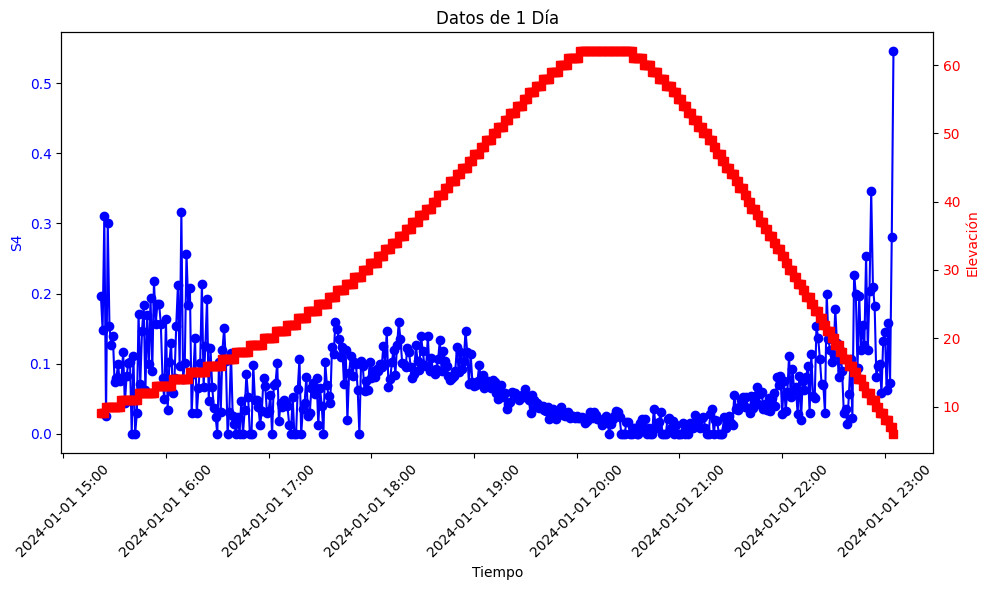

In [27]:
# Crear intervalos de tiempo para probar la funcionalidad
hoy = df['Tiempo'].min()  # Fecha inicial del dataset

# 1 día de datos
inicio_dia = hoy
fin_dia = hoy + timedelta(days=1)
graficar_por_periodo(ID_Sat_2, inicio_dia, fin_dia, 'Datos de 1 Día')

## **GRAFICO DE 7 DIAS**

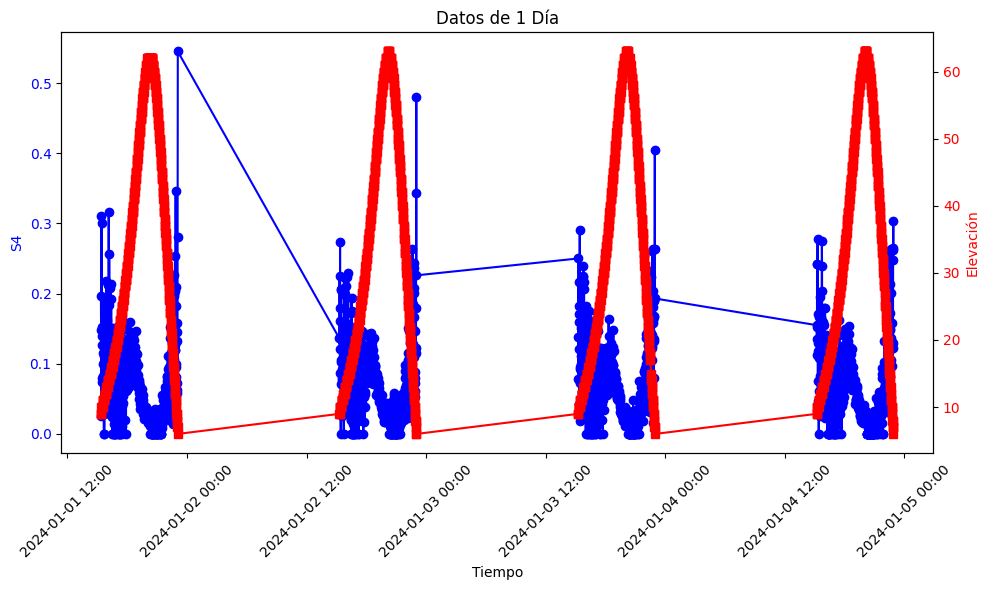

In [35]:
# Crear intervalos de tiempo para probar la funcionalidad
hoy = df['Tiempo'].min()  # Fecha inicial del dataset

# 1 día de datos
inicio_dia = hoy
fin_dia = hoy + timedelta(days=4)
graficar_por_periodo(ID_Sat_2, inicio_dia, fin_dia, 'Datos de 1 Día')

## **GRAFICO DE SEMANAS**

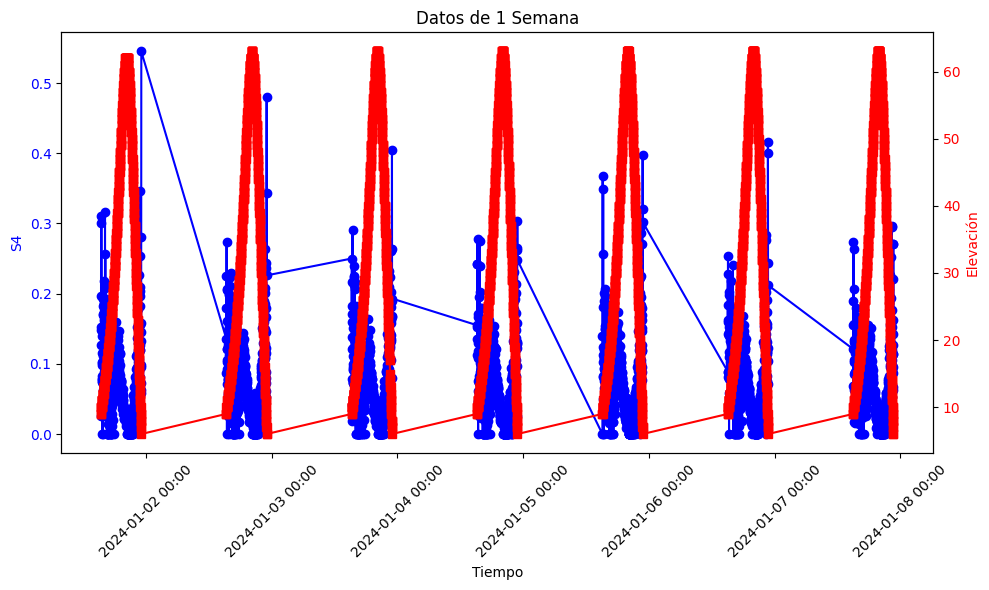

In [32]:
# 1 semana de datos
inicio_semana = hoy
fin_semana = hoy + timedelta(weeks=1)
graficar_por_periodo(ID_Sat_2, inicio_semana, fin_semana, 'Datos de 1 Semana')

##**GRAFICO DE 1 MES**

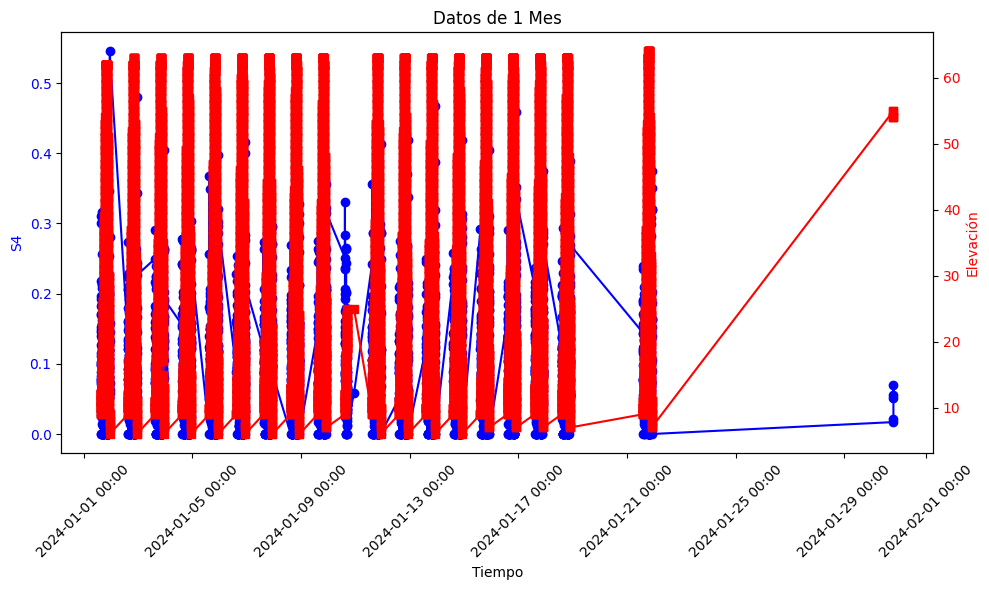

In [33]:
# 1 mes de datos
inicio_mes = hoy
fin_mes = hoy + timedelta(days=30)
# debemos seleccionar en el primer atributo el dataframe correspondiente solo al ID del Satelite
graficar_por_periodo(ID_Sat_2, inicio_mes, fin_mes, 'Datos de 1 Mes')

##**GRAFICA DE VARIOS MESES**

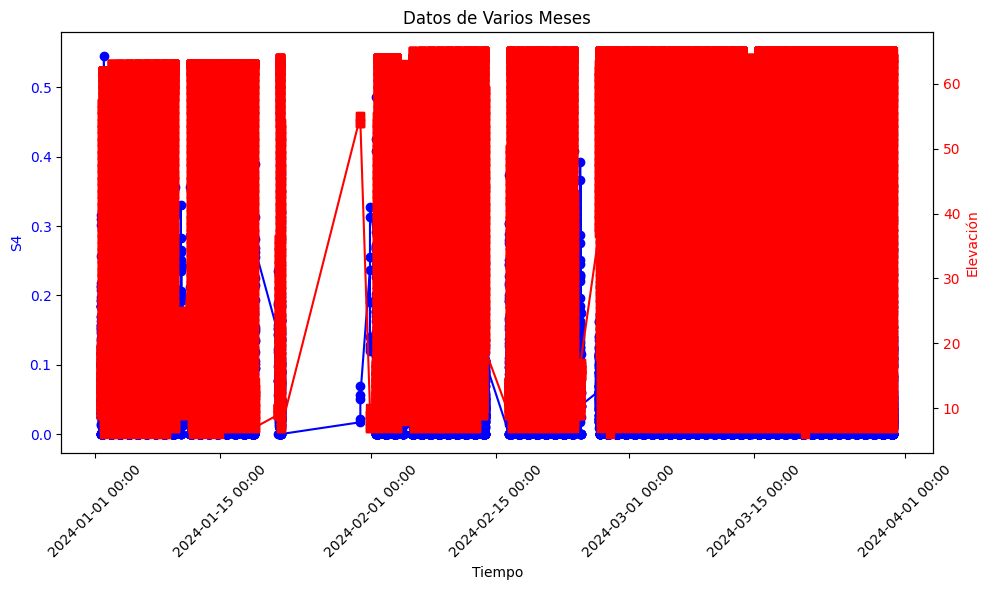

In [34]:
# Varios meses (ejemplo: 3 meses)
inicio_varios_meses = hoy
fin_varios_meses = hoy + timedelta(days=90)
graficar_por_periodo(ID_Sat_2, inicio_varios_meses, fin_varios_meses, 'Datos de Varios Meses')

## **METODO GRAFICAR POR PERIODO - V2**

In [40]:
import math
# Función para graficar
def graficar_por_periodo(df, inicio, fin, ids, titulo):
    # Filtrar datos por rango de tiempo e IDs
    datos_filtrados = df[(df['Tiempo'] >= inicio) & (df['Tiempo'] <= fin) & (df['ID Satélite'].isin(ids))]

    # Verificar la cantidad de satélites
    num_satelites = len(ids)
    columnas = 2 if num_satelites >= 40 else 1
    filas = math.ceil(num_satelites / columnas)

    # Crear figura y ejes
    fig, axes = plt.subplots(filas, columnas, figsize=(15, 5 * filas), sharex=True)
    axes = axes.flatten() if num_satelites > 1 else [axes]

    # Graficar cada satélite en su propio eje
    for idx, sat_id in enumerate(ids):
        if idx >= len(axes):  # Evitar errores si hay más IDs que ejes
            break
        ax = axes[idx]
        data_satelite = datos_filtrados[datos_filtrados['ID Satélite'] == sat_id]

        # Graficar S4
        ax.plot(data_satelite['Tiempo'], data_satelite['S4'], color='blue', marker='o', label='S4')
        ax.set_ylabel('S4', color='blue')
        ax.tick_params(axis='y', labelcolor='blue')

        # Crear eje secundario para Elevación
        ax2 = ax.twinx()
        ax2.plot(data_satelite['Tiempo'], data_satelite['Elevación'], color='red', marker='s', label='Elevación')
        ax2.set_ylabel('Elevación', color='red')
        ax2.tick_params(axis='y', labelcolor='red')

        # Títulos
        ax.set_title(f'Satélite ID: {sat_id}')

    # Eliminar ejes vacíos si hay menos gráficos que espacios
    for idx in range(len(ids), len(axes)):
        fig.delaxes(axes[idx])

    # Ajustar el diseño
    plt.suptitle(titulo)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Espacio para el título
    plt.show()



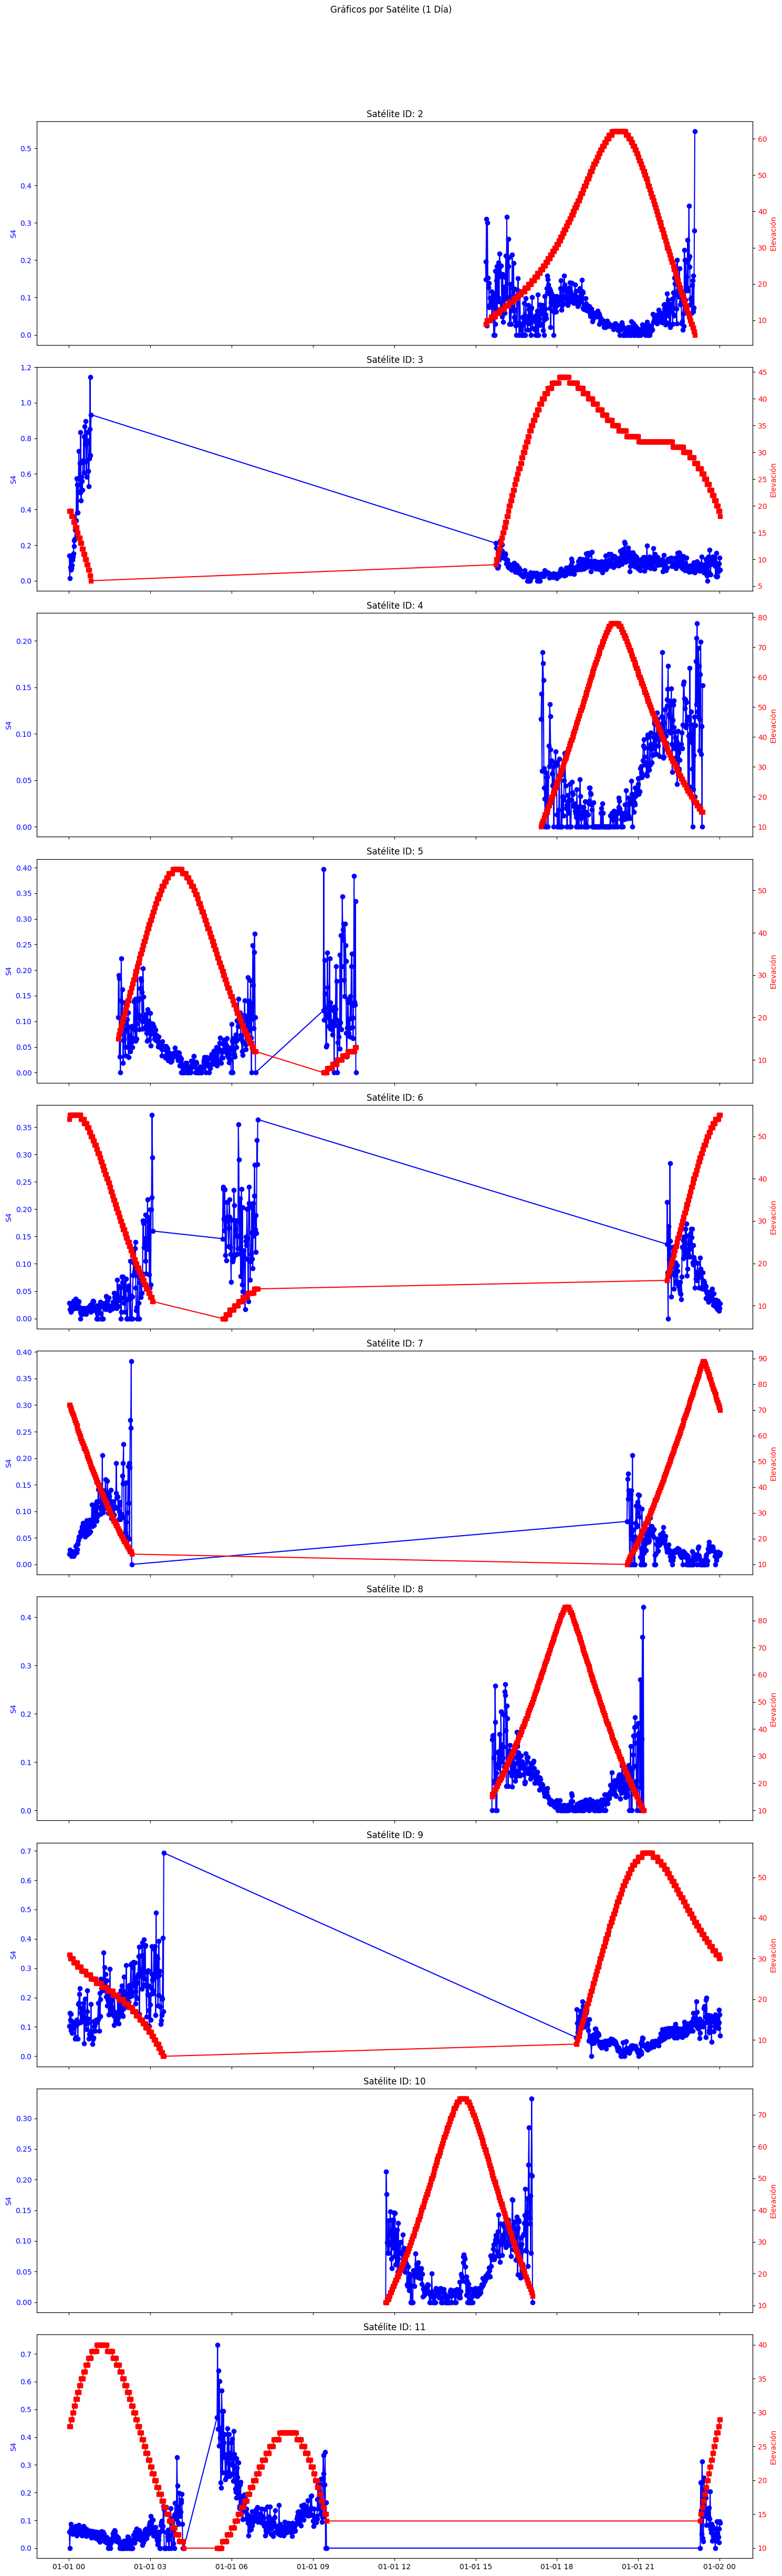

In [41]:
# Crear intervalos de tiempo
hoy = df['Tiempo'].min()
inicio = hoy
fin = hoy + timedelta(days=1)

# Lista de IDs a graficar
ids_a_graficar = list(range(2, 12))  # IDs del 1 al 50

# Llamar a la función
graficar_por_periodo(df, inicio, fin, ids_a_graficar, 'Gráficos por Satélite (1 Día)')

## **COMPLETANDO LA INFORMACION CON NAN**

AQUI TENEMOS EL DataFrame data_filled con todos los minutos completados para graficar las 24 horas diariamente.

In [44]:
# Cargar los datos del archivo CSV

# Generar un rango de tiempo completo de 24 horas (intervalos de 1 minuto)
start_time = df['Tiempo'].min().replace(hour=0, minute=0, second=0)
end_time = start_time + pd.Timedelta(days=365)
full_time_range = pd.date_range(start=start_time, end=end_time, freq='1T')

# Completar datos faltantes con NaN para cada satélite
satellites = sorted(df['ID Satélite'].unique())
filled_data = []
for satellite_id in satellites:
    sat_data = df[df['ID Satélite'] == satellite_id]
    sat_data = sat_data.set_index('Tiempo').reindex(full_time_range).reset_index()
    sat_data['ID Satélite'] = satellite_id
    filled_data.append(sat_data)

data_filled = pd.concat(filled_data)
data_filled.rename(columns={'index': 'Tiempo'}, inplace=True)

<ipython-input-44-f7bae8563295>:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_time_range = pd.date_range(start=start_time, end=end_time, freq='1T')


In [45]:
data_filled.head()


,Tiempo,ID Satélite,S4,Elevación
0,2024-01-01 00:00:00,1,NaN,NaN
1,2024-01-01 00:01:00,1,NaN,NaN
2,2024-01-01 00:02:00,1,NaN,NaN
3,2024-01-01 00:03:00,1,NaN,NaN
4,2024-01-01 00:04:00,1,NaN,NaN


## **GRAFICANDO LAS 24 HORAS**

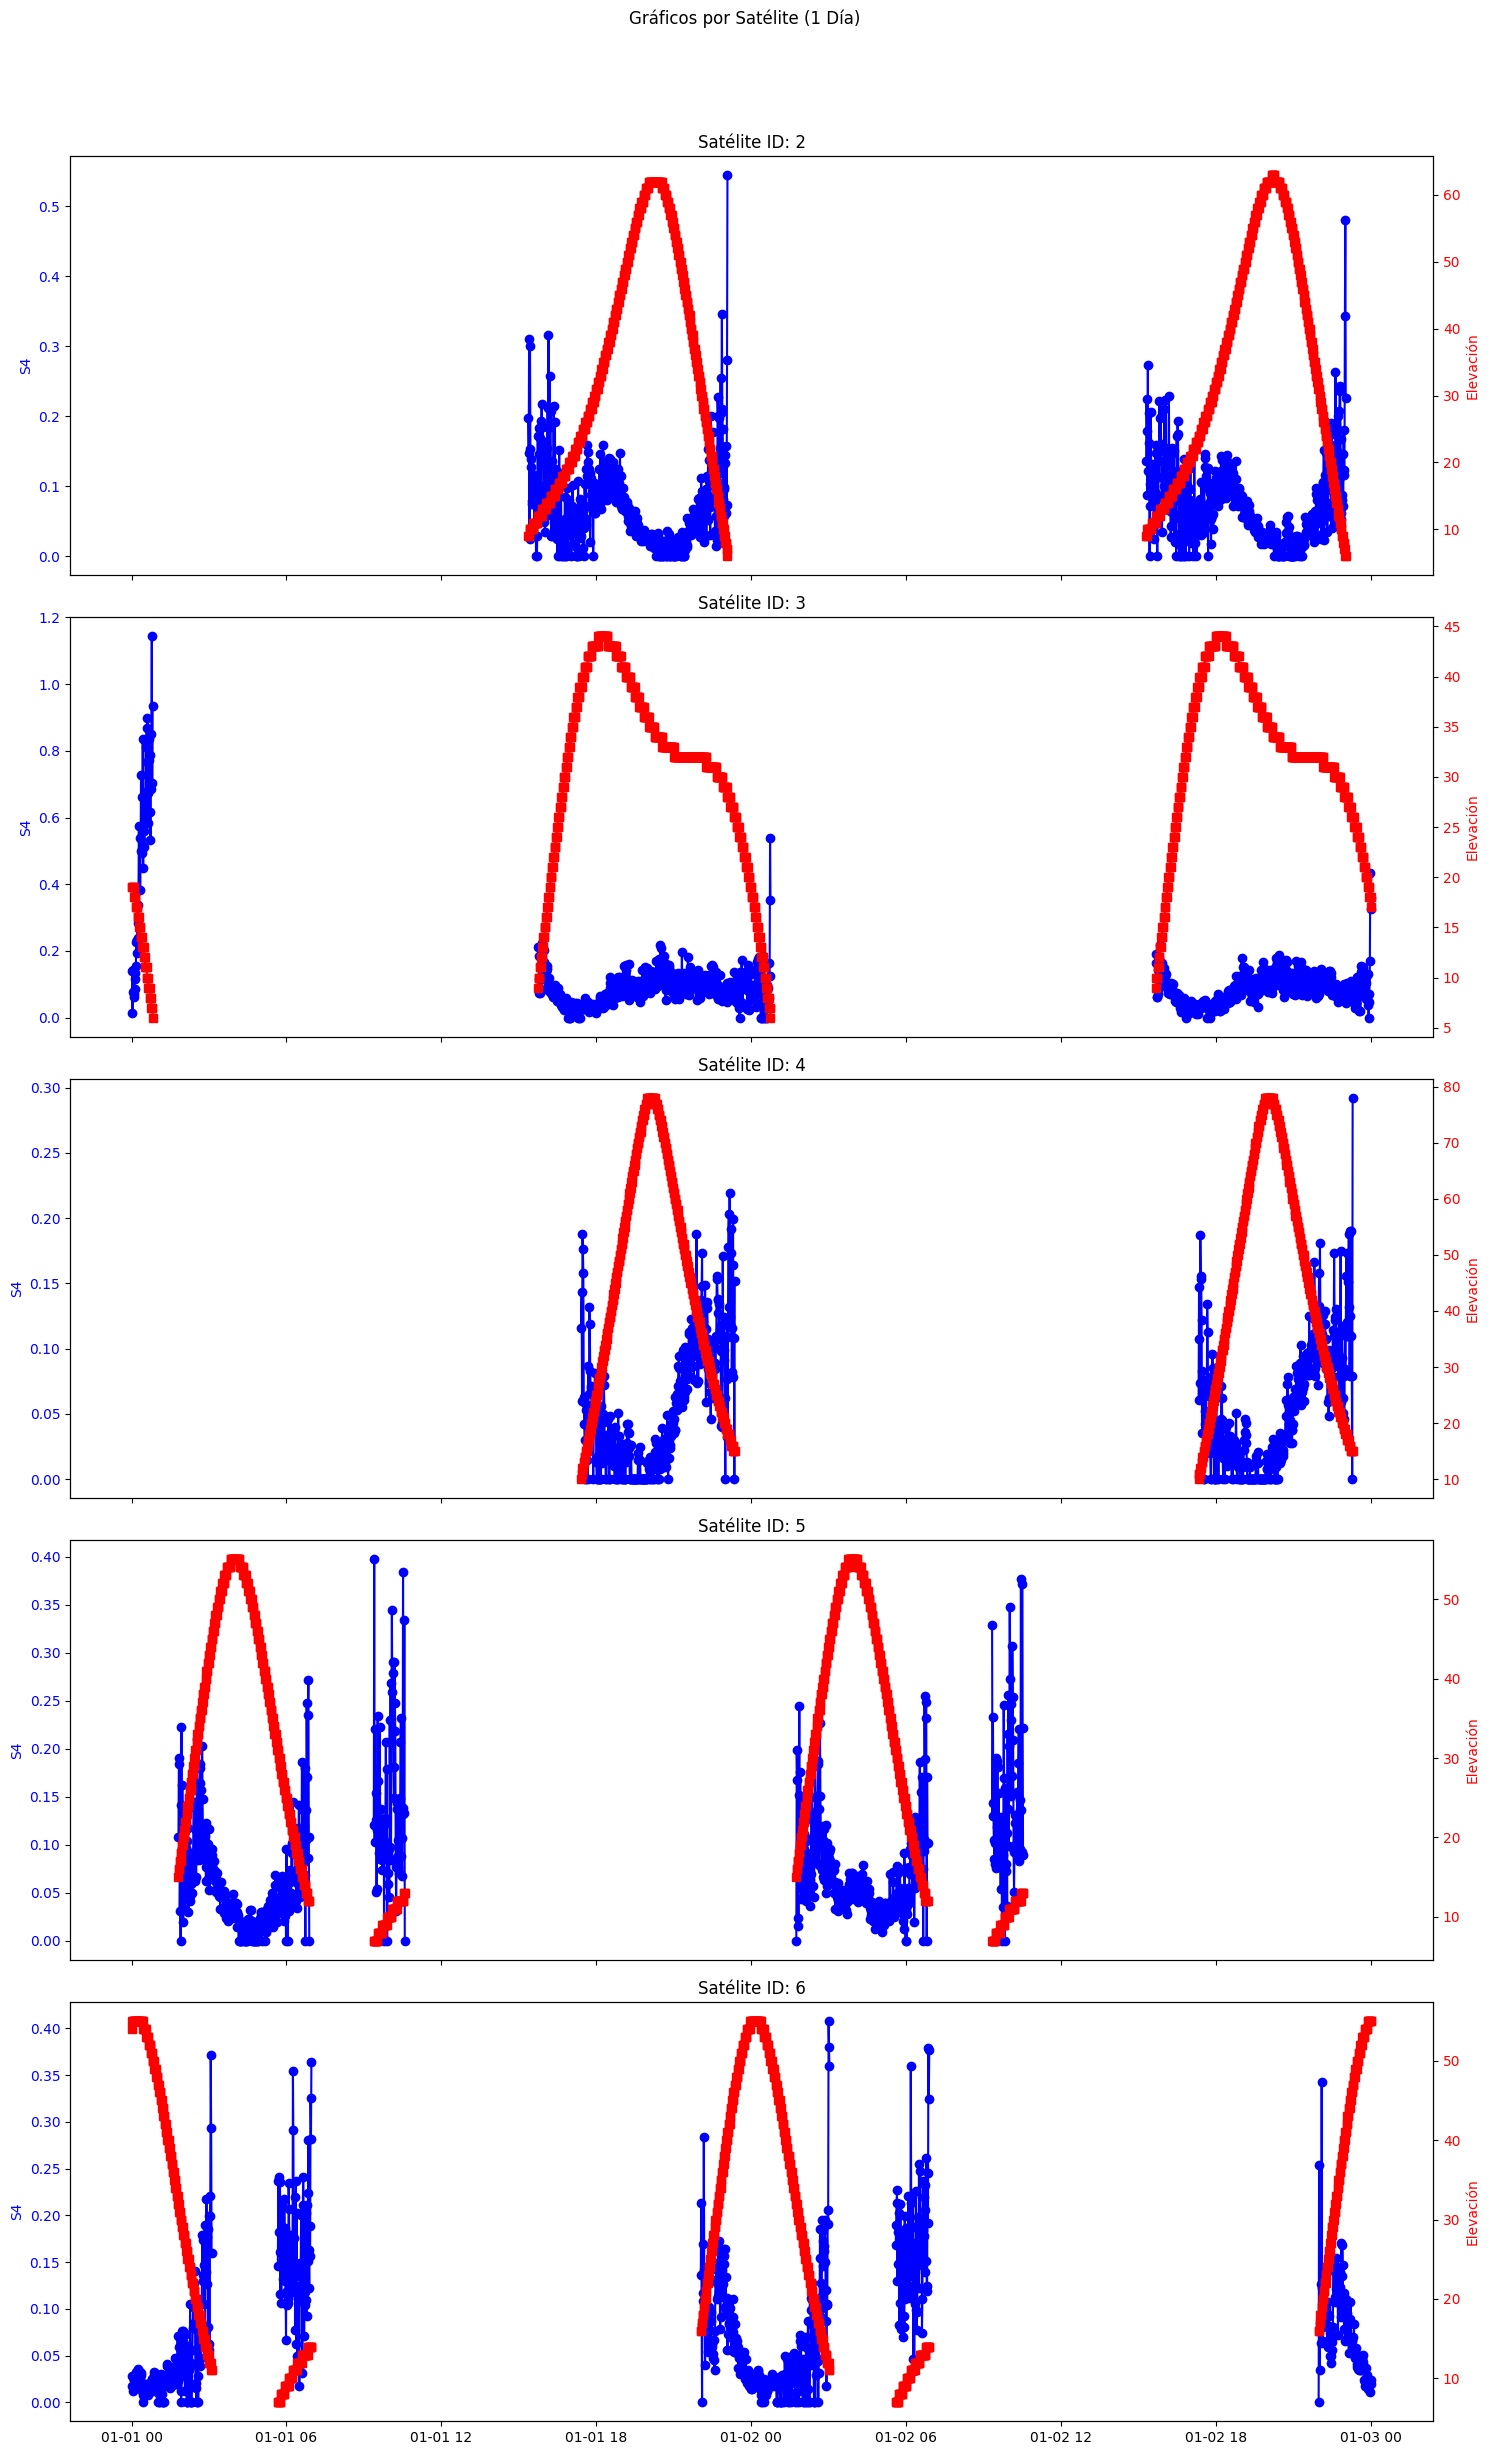

In [49]:
# Crear intervalos de tiempo
hoy = df['Tiempo'].min()
inicio = hoy
fin = hoy + timedelta(days=2)

# Lista de IDs a graficar
ids_a_graficar = list(range(2, 7))  # IDs del 1 al 50

# Llamar a la función
graficar_por_periodo(data_filled, inicio, fin, ids_a_graficar, 'Gráficos por Satélite (1 Día)')

# **4. ENTENDIMIENTO Y PREPARACION DE DATOS**

* Para pronosticar valores del índice S4 a 5 o 10 minutos en adelante,  abordamos el problema como una tarea de predicción de series temporales utilizando técnicas de machine learning.

* La calidad y la estructura de los datos son cruciales para un modelo de predicción eficiente.

## **Características del dataset:**

* Datos del índice S4 minuto a minuto para casi todos los días de 2024.
* Predicción de 5 o 10 minutos en el futuro.

## **A) Pasos de Preprocesamiento**

1. **Limpieza de datos:**

* Reemplazamos  valores faltantes o anómalos (usando interpolación, media, etc.).
* Verificarnis la continuidad temporal: si faltan minutos consecutivos, podrías completamos los datos (forward fill o técnicas similares).

2. **Creación de nuevas características:**

* Agregamos variables como:
  * Media móvil (e.g., ventana de 5, 10, o 15 minutos).
  * Desviación estándar móvil.
  * Hora del día, día de la semana (para capturar patrones horarios o diarios).
  * Tendencias recientes (diferencias de los valores en los últimos minutos).
* Incluir datos lag (valores pasados como entrada):
  Por ejemplo,
S4(t−1), S4(t−2), ..., S4(t−n), donde 𝑛 depende del horizonte temporal.

3. **Estructuración de los datos para predicción:**

* Creamos un conjunto de datos supervisado:
  Entradas:
      * X=[S4(t−1),S4(t−2),...,S4(tn)].
  Salidas:
      * y=S4(t+5) o y=S4(t+10) según el horizonte.

## **B) Seleccionar modelos adecuados**
Para series temporales, pUSAREMOS modelos tradicionales o basados en aprendizaje profundo.

* Modelos tradicionales:
  ARIMA/SARIMA:

  1. Modelos clásicos para series temporales.
  Útil si el índice S4 tiene un componente estacional.
  Limitados en capturar relaciones no lineales o patrones complejos.
  
  2. Regresión basada en features:

  Modelos como Random Forest, Gradient Boosting (XGBoost, LightGBM).
  Usan las características lag y derivadas para hacer predicciones.

* Modelos avanzados de machine learning:

  1. Redes Neuronales Recurrentes (RNN):

  Modelos como LSTM o GRU son adecuados para capturar dependencias a largo plazo en series temporales.
  Requieren más datos y mayor procesamiento.

  2. Transformers para series temporales:

  Modelos como Temporal Fusion Transformer (TFT) están diseñados para manejar datos secuenciales y contextuales.
  
  3. Modelos híbridos:

  Combinar ARIMA con redes neuronales para capturar tanto patrones lineales como no lineales.

3. Pipeline de modelado
Flujo de trabajo para construir el modelo de predicción:

  (a) División de datos:
  Dividir el dataset en entrenamiento (70%), validación (20%), y prueba (10%).
  Preservar el orden temporal (no mezclar datos futuros con datos pasados).

  (b) Normalización de datos:
  Escalar los valores entre 0 y 1 (min-max scaling) o usar estandarización (

  (c) Selección de horizonte de predicción:
  Definimos  el horizonte de predicción (5 o 10 minutos).
  Por ejemplo, si predices S4(t+5), tus entradas serán hasta t.

  (d) Entrenamiento del modelo:
  Entrena el modelo seleccionado con los datos de entrenamiento.
  Ajusta hiperparámetros usando los datos de validación.

  (e) Evaluación:
  Métricas comunes para evaluar:
  MAE (Mean Absolute Error).
  RMSE (Root Mean Squared Error).
  MAPE (Mean Absolute Percentage Error).

  (f) Predicción:
  Una vez entrenado, usa el modelo para predecir
  S4 a 5 o 10 minutos en adelante.

# **5. IMPLEMENTACION PRACTICA**

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Cargar datos
df_total = pd.read_csv(file_dir)
# filtro seleccionando Satelite 2
# Aplicar el filtro para seleccionar solo las filas con ID Satélite igual a 2
data= df_total[df_total['ID Satélite'] == 2] # ESTE ES NUESTRO DATASET DEL SATELITE CON ID 2
data['Tiempo'] = pd.to_datetime(data['Tiempo'])
data.set_index('Tiempo', inplace=True)

# Normalizar
scaler = MinMaxScaler()
data['S4_scaled'] = scaler.fit_transform(data[['S4']])

# Crear datos supervisados
############################################################################
# ANALIZAR MAS A DETALLE EL HIPOTESIS DE LOS DATOS DE ENTRADA Y LA SALIDA
# EN QUE CONSISTE LOS DATOS DE ENTRADA
############################################################################

def create_sequences(data, n_steps, horizon):
    X, y = [], []
    for i in range(len(data) - n_steps - horizon):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps+horizon])
    return np.array(X), np.array(y)

n_steps = 10  # Minutos pasados
horizon = 5  # Horizonte de predicción
X, y = create_sequences(data['S4_scaled'].values, n_steps, horizon)

# Dividir en entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


<ipython-input-8-2aa43ef732e3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tiempo'] = pd.to_datetime(data['Tiempo'])
<ipython-input-8-2aa43ef732e3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S4_scaled'] = scaler.fit_transform(data[['S4']])


In [9]:
X_train[0]

array([0.12507937, 0.09396825, 0.1968254 , 0.01587302, 0.19111111,
       0.09714286, 0.08063492, 0.08825397, 0.04698413, 0.05015873])

In [10]:
X_test[0]

array([0.0552381 , 0.06031746, 0.08571429, 0.07619048, 0.09396825,
       0.09396825, 0.04952381, 0.05904762, 0.04761905, 0.04825397])

In [12]:

# Crear modelo LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Entrenar modelo
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Hacer predicciones
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)  # Volver a la escala original

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2926/2926 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 2/5
2926/2926 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 3/5
2926/2926 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 9.9131e-04 - val_loss: 0.0018
Epoch 4/5
2926/2926 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 9.9462e-04 - val_loss: 0.0019
Epoch 5/5
2926/2926 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 9.7787e-04 - val_loss: 0.0017
915/915 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


# **. VEAMOS METRICAS DE RENDIMIENTO**

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular métricas
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
mape = mean_absolute_percentage_error(y_test_original, y_pred)

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.3f}")


MAE: 0.041
RMSE: 0.089
MAPE: 14898669719594.262


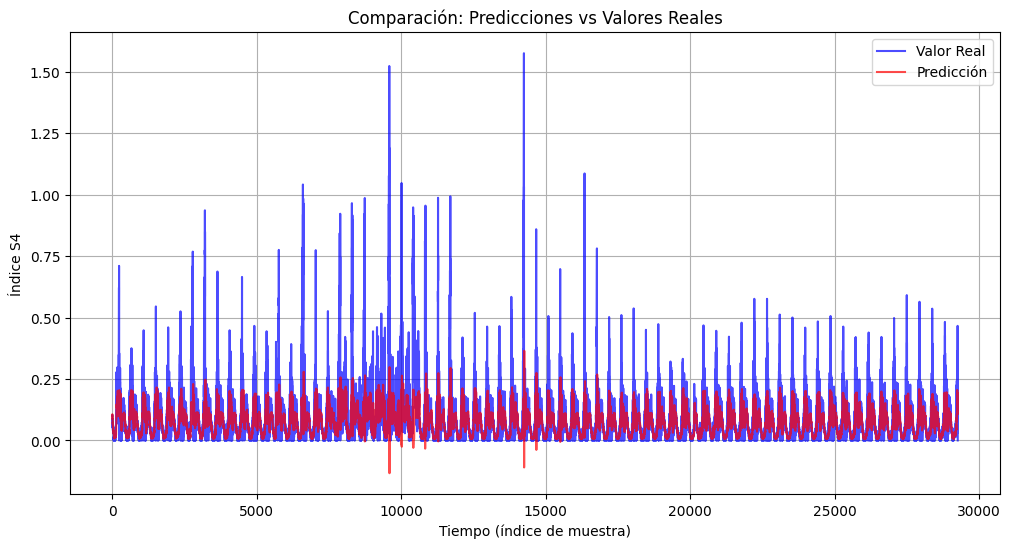

In [53]:
import matplotlib.pyplot as plt

# Gráfica de predicciones vs valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label="Valor Real", color="blue", alpha=0.7)
plt.plot(y_pred, label="Predicción", color="red", alpha=0.7)
plt.title("Comparación: Predicciones vs Valores Reales")
plt.xlabel("Tiempo (índice de muestra)")
plt.ylabel("Índice S4")
plt.legend()
plt.grid(True)
plt.show()